<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

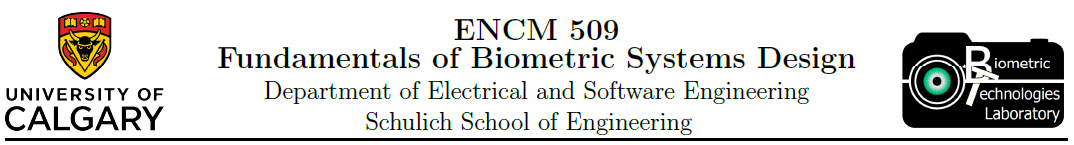

## Lab 3:

* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

## Introduction:
In this lab we take a look at Gaussian Mixture Model and how changing the number of training components can affect the results of a Gaussian Mixture model.We also applied knowledge learned from our lectures to find the FAR and FRR using hypothesis testing.

For this lab we used the signatures collected in lab 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
#loading the data

# data folder:
base_dir = './sig_vals/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'g'
dir_impostor = base_dir + 'i'
dir_words = base_dir + 'w'
# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30
# lists to store the loaded signatures
auth_lst = []
imp_lst = []
words_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))
    csv_words = pd.read_csv(dir_words + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values) #ndarray
    imp_lst.append(csv_imp.values)
    words_lst.append(csv_words.values)

## Exercise 1

In [3]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = [20,25]

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = [20,60]


The number of signatures for training is the first 20 signatures from the genuine set is ,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.7757
Deviation of authentic scores: 0.6159
Average of forgery scores: -50.3739
Deviation of forgery scores: 60.1918


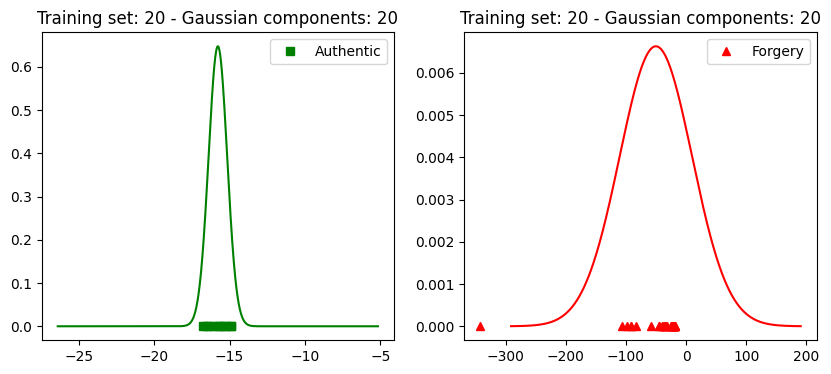

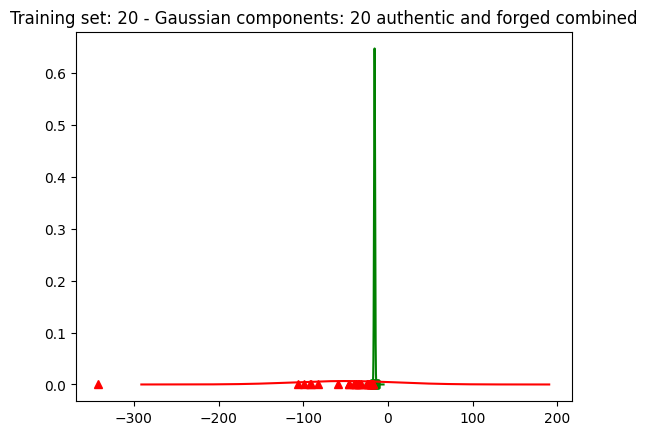

The number of signatures for training is the first 20 signatures from the genuine set is ,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.6127
Deviation of authentic scores: 1.0060
Average of forgery scores: -144.0758
Deviation of forgery scores: 206.5981


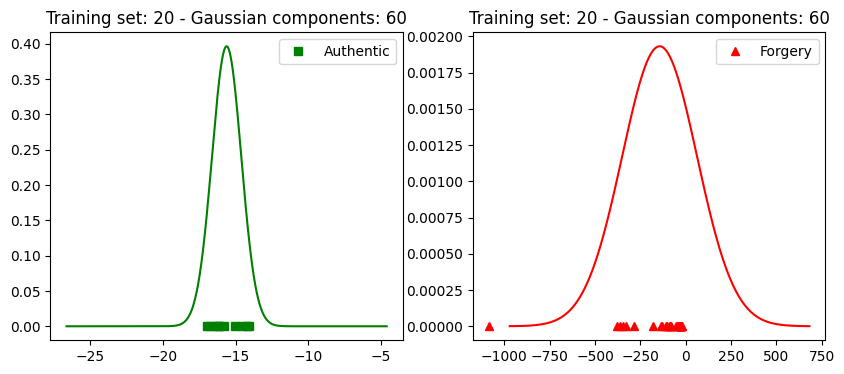

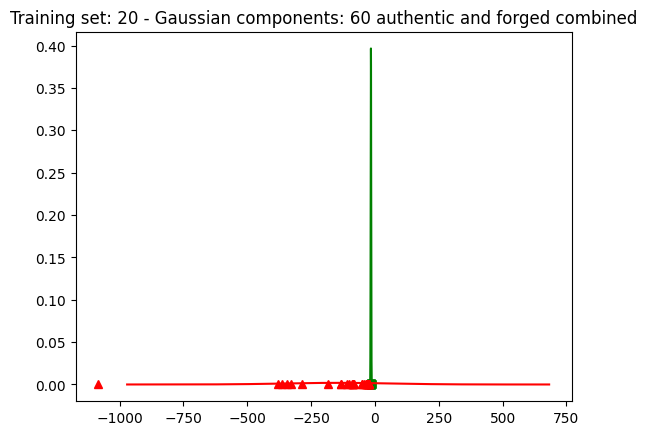

The number of signatures for training is the first 25 signatures from the genuine set is ,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.0165
Deviation of authentic scores: 0.6108
Average of forgery scores: -38.0241
Deviation of forgery scores: 33.7086


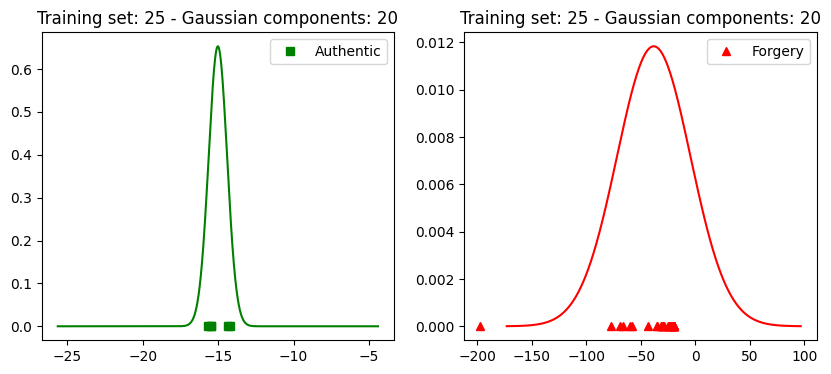

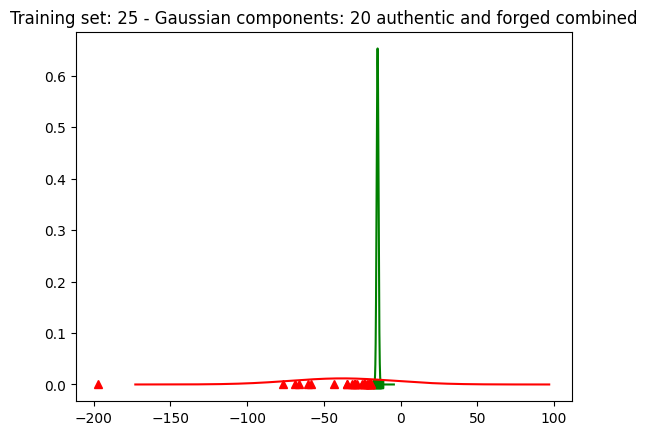

The number of signatures for training is the first 25 signatures from the genuine set is ,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.8230
Deviation of authentic scores: 0.7466
Average of forgery scores: -95.7671
Deviation of forgery scores: 109.0896


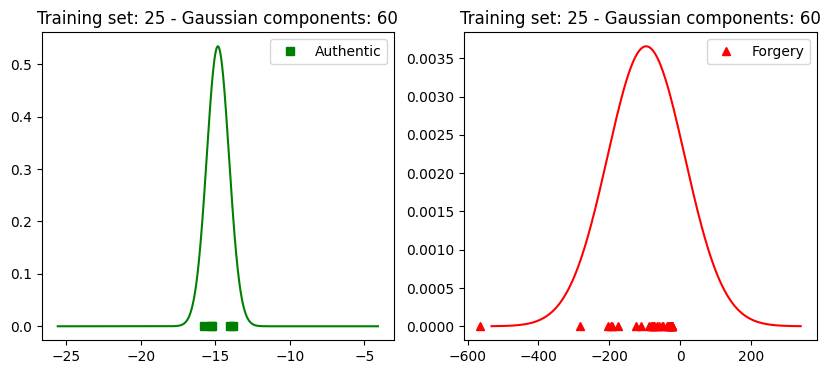

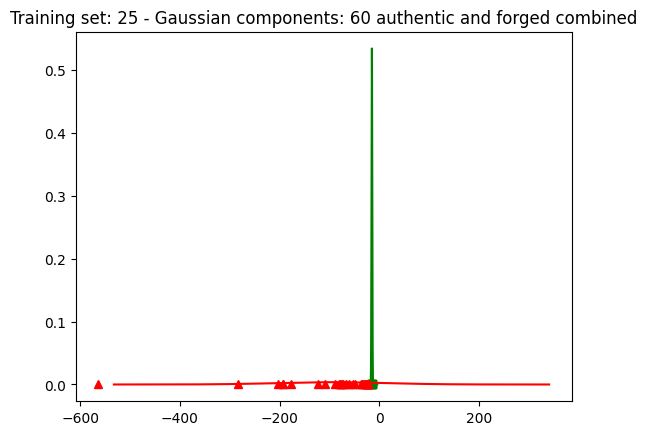

Mean of the 4 genuine scores -15.436047269978257
Std of the 4 genuine scores 0.8716129709808229
Mean of the 4 imposter (forgery) scores -82.06021850550631
Std of the 4 imposter (forgery) scores 128.76301423077552


In [13]:
gmmList = [] #store the models created
aScoresList = [] #store the genuine scores
fScoresList1 = [] #store the imposter scores from the first set (forgery)

for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the genuine set is ,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        gmmList.append(gmm)

        # to store all the scores calculated
        aScores = [] 
        fScores = []

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(imp_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)
        aScoresList.append(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)
        fScoresList1.append(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Deviation of authentic scores: %.4f' % (aStd))

        print('Average of forgery scores: %.4f' % (fMu))
        print('Deviation of forgery scores: %.4f' % (fStd))

        #PDF of the genuine and imposter samples
        plt.figure(figsize=(10,4))

        #Authentic set
        plt.subplot(1,2,1)
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))

        # Forged (impostor) set
        plt.subplot(1,2,2)
        x = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        #Combined authentic and imposter plot
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

aScoresFlat = [i for subScores in aScoresList for i in subScores]
fScoresList1Flat = [i for subScores in fScoresList1 for i in subScores]
print("Mean of the 4 genuine scores",np.mean(aScoresFlat))
print("Std of the 4 genuine scores",np.std(aScoresFlat))
print("Mean of the 4 imposter (forgery) scores",np.mean(fScoresList1Flat))
print("Std of the 4 imposter (forgery) scores",np.std(fScoresList1Flat))

From the results we can see that increasing the number of components is increasing the deviation in the models for both the authentic and forged signature dataset. Furthermore when we are overlapping the authentic and forged models, we can see that the model based on the authentic signatures has a large spike compared to the model based on the forged signatures, this is due to the large difference in deviation.

## Exercise 2

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.7757
Deviation of authentic scores: 0.6159
Average of second set of forgery scores: -30.3182
Deviation of second set of forgery scores: 21.1262


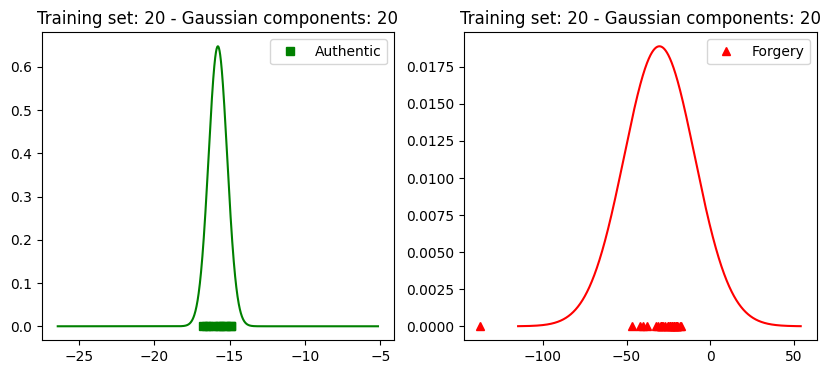

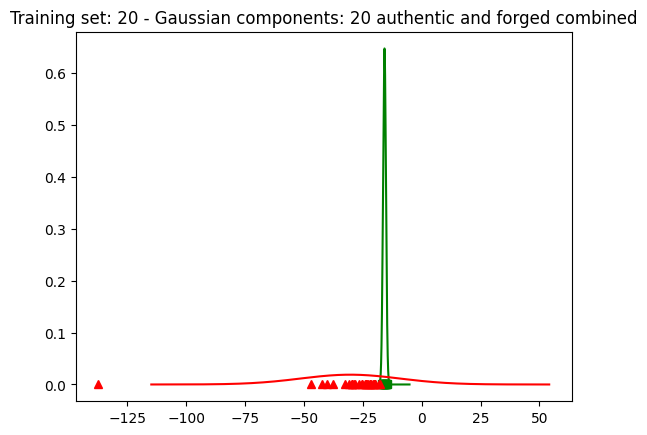

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.6127
Deviation of authentic scores: 1.0060
Average of second set of forgery scores: -70.6268
Deviation of second set of forgery scores: 95.4040


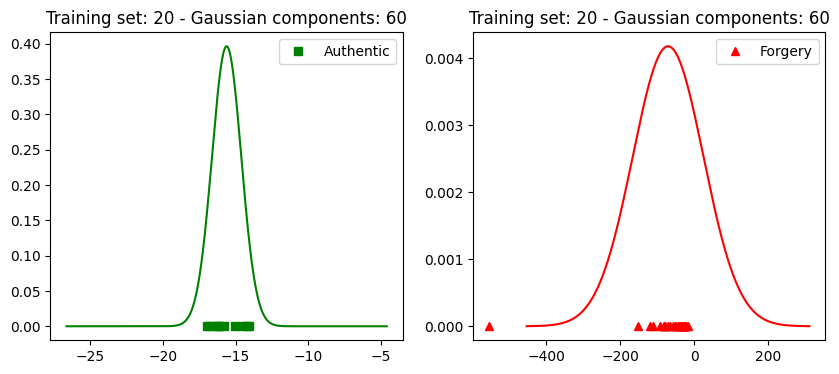

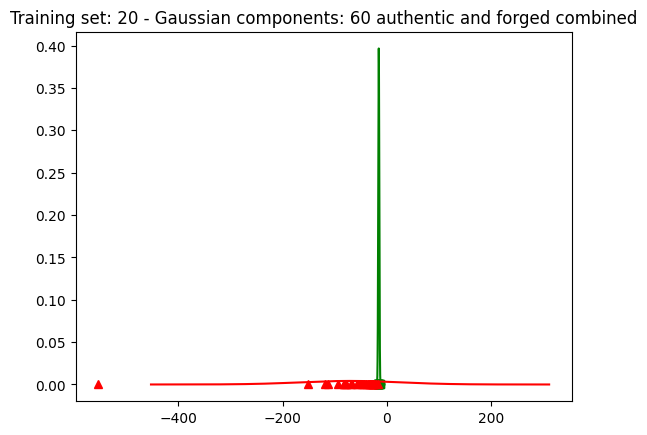

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.0165
Deviation of authentic scores: 0.6108
Average of second set of forgery scores: -26.2845
Deviation of second set of forgery scores: 10.4475


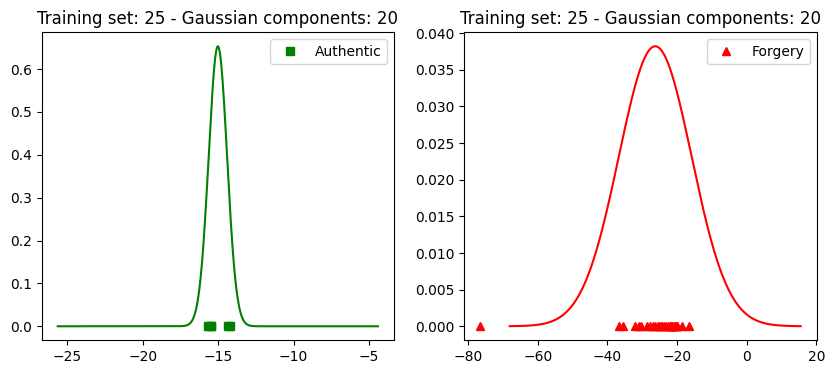

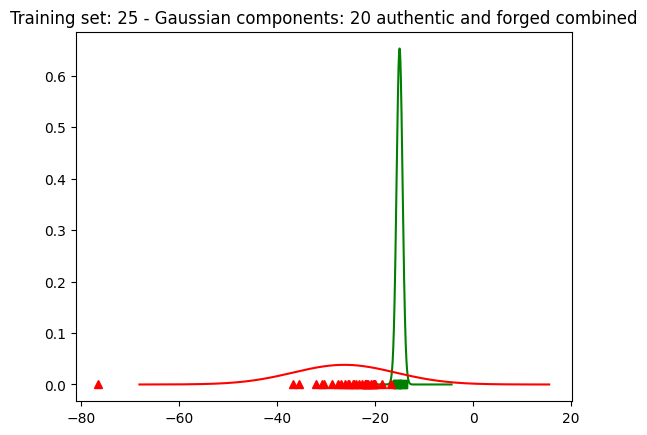

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.8230
Deviation of authentic scores: 0.7466
Average of second set of forgery scores: -53.2245
Deviation of second set of forgery scores: 37.2227


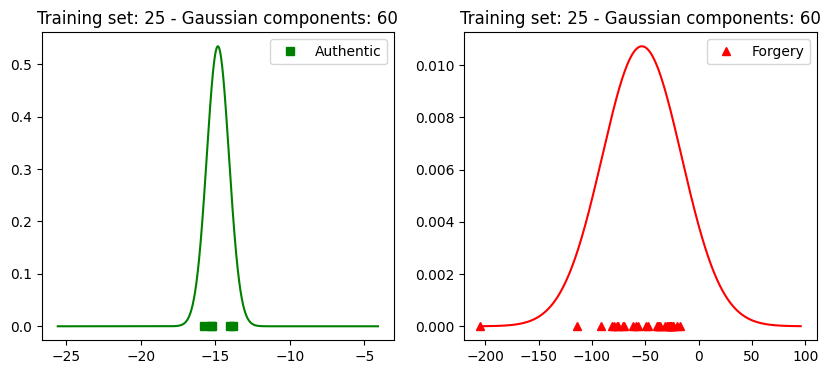

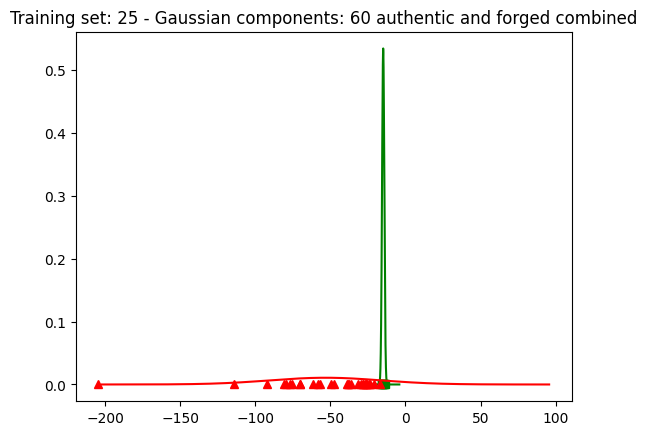

Mean of the 4 genuine scores -15.436047269978257
Std of the 4 genuine scores 0.8716129709808229
Mean of the 4 imposter (random words) scores -45.11346538908621
Std of the 4 imposter (random words) scores 55.527165876548715


In [14]:
j = 0 #to traverse the gmmList, use the same model as exercise 2 but just testing with a the second imposter set, that way genuine scores do not change
fScoresList2 = [] #store the imposter scores from the second set (random words)
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        gmm = gmmList[j] #using the same models that were trained in ex 1

        # to store all the scores calculated for second imposter set
        fScores = []

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(words_lst[i], (-1,4)) # taking from the impostor samples
            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aScores = aScoresList[j]
        aMu = np.mean(aScores) #same aScores as ex1
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)
        fScoresList2.append(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Deviation of authentic scores: %.4f' % (aStd))

        print('Average of second set of forgery scores: %.4f' % (fMu))
        print('Deviation of second set of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        #PDF of the genuine and imposter samples
        plt.figure(figsize=(10,4))

        #Authentic set
        plt.subplot(1,2,1)
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))

        # Forged (impostor) set
        plt.subplot(1,2,2)
        x = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        #Combined authentic and imposter plot
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

        j = j+1

aScoresFlat = [i for subScores in aScoresList for i in subScores]
fScoresList2Flat = [i for subScores in fScoresList2 for i in subScores]
print("Mean of the 4 genuine scores",np.mean(aScoresFlat))
print("Std of the 4 genuine scores",np.std(aScoresFlat))
print("Mean of the 4 imposter (random words) scores",np.mean(fScoresList2Flat))
print("Std of the 4 imposter (random words) scores",np.std(fScoresList2Flat))


Very similar to exercise 2 we can see that increasing the number of components is increasing the deviation in the models for both the authentic and second set of forged signature dataset. Furthermore when we are overlapping the authentic and second set of forged models, we can see that the model based on the authentic signatures has a large spike compared to the model based on the second set of forged signatures, this is due to the large difference in deviation.

## Exercise 3

In [19]:
from math import sqrt
#NOT DONE
gMean = round(np.mean(aScoresFlat),2)
gStd = round(np.std(aScoresFlat),2)
i1Mean = round(np.mean(fScoresList1Flat),2)
i1Std = round(np.std(fScoresList1Flat),2)
i2Mean = round(np.mean(fScoresList2Flat),2)
i2Std = round(np.std(fScoresList2Flat),2)

#calculated and displayed in ex1 and ex2 as well
print("Mean of the genuine scores: ",gMean)
print("Std of the genuine scores: ",gStd)
print("Mean of the imposter (forgery) scores: ",i1Mean)
print("Std of the imposter (forgery) scores: ",i1Std)
print("Mean of the imposter (random words) scores: ",i2Mean)
print("Std of the imposter (random words) scores: ",i2Std,"\n")

print("confidence interval for alpha = 0.05 using mean of the genuine scores")
left = round(gMean-1.96*(gStd/sqrt(30)),2)
right = round(gMean+1.96*(gStd/sqrt(30)),2)
print(left,"< \u03BC <",right)
hyp = -0.01+(left+right )/2
print("Null hypothesis: \u03BC =",round(hyp,2))
print("FRR = P(Type 1 Error) = \u03B1 = ",0.05)
#calculating FAR
altHyp =  round((left+right )/2-0.32,2)
print("FAR = P(Type 2 Error) = \u03B2 = P(",left,"< \u03BC <",right,"when \u03BC = ",altHyp,")")
z1 = round((left-altHyp)/(gStd/(sqrt(30))),2)
z2 = round((right-altHyp)/(gStd/(sqrt(30))),2)
print("FAR = \u03B2 = P(",z1,"< \u03BC <",z2,")")
print("FAR = ",round(0.99970-0.52392,2))

print("\nChanging the critical values")
nLeft = -15.82
nRight = -15.13
print(nLeft,"< \u03BC <",nRight)

new_z1 = round((nLeft-hyp)/(gStd/(sqrt(30))),2)
new_z2 = round((nRight-hyp)/(gStd/(sqrt(30))),2)
print("FRR = P(z<",new_z1,") + P(z>",new_z2,")")
print("FRR=",round(0.01500-(1-0.98713),3))
nAltHyp = round((nLeft+nRight )/2-0.29,2)
print("FAR = P(Type 2 Error) = \u03B2 = P(",nLeft,"< \u03BC <",nRight,"when \u03BC = ",nAltHyp,")")
far_z1 = round((nLeft-nAltHyp)/(gStd/(sqrt(30))),2)
far_z2 = round((nRight-nAltHyp)/(gStd/(sqrt(30))),2)
print("FAR = \u03B2 = P(",far_z1,"< \u03BC <",far_z2,")")
print("FAR = ",round(0.99998-0.37448,2))

Mean of the genuine scores:  -15.44
Std of the genuine scores:  0.87
Mean of the imposter (forgery) scores:  -82.06
Std of the imposter (forgery) scores:  128.76
Mean of the imposter (random words) scores:  -45.11
Std of the imposter (random words) scores:  55.53 

confidence interval for alpha = 0.05 using mean of the genuine scores
-15.75 < μ < -15.13
Null hypothesis: μ = -15.45
FRR = P(Type 1 Error) = α =  0.05
FAR = P(Type 2 Error) = β = P( -15.75 < μ < -15.13 when μ =  -15.76 )
FAR = β = P( 0.06 < μ < 3.97 )
FAR =  0.48

Changing the critical values
-15.82 < μ < -15.13
FRR = P(z< -2.33 ) + P(z> 2.01 )
FRR= 0.002
FAR = P(Type 2 Error) = β = P( -15.82 < μ < -15.13 when μ =  -15.77 )
FAR = β = P( -0.31 < μ < 4.03 )
FAR =  0.63
